In [2]:
import tensorflow as tf #import tensorflo
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import os
import random

In [5]:

import matplotlib.image as mpimage
from PIL import Image

import keras.utils.np_utils

Using TensorFlow backend.


In [14]:
path = "./Sample/Train_Full_Data/"
folders = os.listdir(path)
imageList=[]
imageMatrix = []
newIm = []
labels=[]
# Get list of folders in current path
for folder in folders:
    newPath = path + folder  #Create new path by adding folder name
    folderName = os.path.split(os.path.abspath(newPath))[1]
    characterName = folderName.split("_")[2]
    imageList=[f for f in os.listdir(newPath) if os.path.splitext(f)[-1] == '.png'] #Check if PNG files only then add
    for image in imageList:   #Traverse the list of files and add each file name to the imageFile
        im = Image.open(newPath+"//"+image)
        labels.append(characterName)
        imageArray = np.asarray(im.getdata())
        flattenedImageArray = imageArray.flatten()
        imageMatrix.append(flattenedImageArray)
print("Size of the image matrix = ",np.size(imageMatrix))

Size of the image matrix =  62668800


In [15]:
a = np.array(imageMatrix)
a
print(a.shape)

(61200, 1024)


In [16]:
import random
from sklearn import preprocessing
#The sklearn.preprocessing module includes scaling, centering, normalization, binarization and imputation methods.

In [88]:
n_samples = len(a)
X = a.reshape((n_samples,-1)) #features
T = np.array(labels) #target
print('Features size = ',X.shape)
print('Labels size = ',T.shape)

Features size =  (61200, 1024)
Labels size =  (61200,)
['waw' 'waw' 'waw' ... 'yaw' 'yaw' 'yaw']


In [87]:
le=preprocessing.LabelEncoder() # to encode the value between 0 and 1
le.fit(T) #we will fit target with label encoder
T=le.transform(T) #transform will fit label encoder and return encoded values

T=keras.utils.np_utils.to_categorical(T) 
#this line of code converts a class vector (integers) to binary class matrix.
print(T)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [22]:
from sklearn.cross_validation import train_test_split
#sklearn train test split to divide the data set into train and test for cross validation

In [23]:
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.3, random_state=34)

In [24]:
print('Train size = ',X_train.shape," ",T_train.shape)

Train size =  (42840, 1024)   (42840, 36)


In [89]:
print('Train size = ',X_test.shape," ",T_test.shape)

Train size =  (18360, 1024)   (18360, 36)


1) Now we train and test the data on the model using cross validation method. Training is done on 42840 samples and is validated with 18360 samples.

2) I have used a simple model of a  convolution neural network 
3) We run the training model for 20 epochs.

In [25]:
import numpy as np
import keras
from keras import models, layers, losses, optimizers, metrics
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import pandas as pd
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.models import Sequential


In [26]:
img_height_rows = 32
img_width_cols = 32

In [27]:
im_shape = (img_height_rows, img_width_cols, 1)
print(im_shape)
x_train = X_train.reshape(X_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
x_test = X_test.reshape(X_test.shape[0], *im_shape)

(32, 32, 1)


In [28]:
cnn = Sequential()

kernelSize = (3, 3)
ip_activation = 'relu' #at input layer relu activation function is choosen
#
ip_conv_0 = Conv2D(filters=4, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
cnn.add(ip_conv_0)

In [29]:
ip_conv_0_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_0_1)

# Add the Pooling layer
pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_0)


In [30]:
ip_conv_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1)
ip_conv_1_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1_1)

pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)

In [31]:
flat_layer_0 = Flatten()
cnn.add(Flatten())


In [32]:
h_dense_0 = Dense(units=20, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_0)
# Let's add one more before proceeding to the output layer
h_dense_1 = Dense(units=1024, activation=ip_activation, kernel_initializer='uniform',name='dense11')
cnn.add(h_dense_1)

In [33]:
n_classes = 36
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)


In [41]:


opt = optimizers.Adagrad(lr=0.0001)
loss = 'categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)



We have divided our entire dataset into 200 batches and fed into our model(Artifical Neural Network) with validation split as 30% of the data. Verbose sets the threshold for what messages will be logged.

In [44]:
history = cnn.fit(x_train, T_train,
                  batch_size=200, epochs=5,
                  validation_data=(x_test, T_test))

Train on 42840 samples, validate on 18360 samples
Epoch 1/5
42840/42840 [==============================] - 22s 512us/step - loss: 0.4777 - acc: 0.8597 - val_loss: 0.5711 - val_acc: 0.8309
Epoch 2/5
42840/42840 [==============================] - 22s 509us/step - loss: 0.4773 - acc: 0.8607 - val_loss: 0.5708 - val_acc: 0.8310
Epoch 3/5
42840/42840 [==============================] - 22s 502us/step - loss: 0.4768 - acc: 0.8609 - val_loss: 0.5702 - val_acc: 0.8300
Epoch 4/5
42840/42840 [==============================] - 23s 538us/step - loss: 0.4763 - acc: 0.8609 - val_loss: 0.5712 - val_acc: 0.8304
Epoch 5/5
42840/42840 [==============================] - 21s 501us/step - loss: 0.4760 - acc: 0.8601 - val_loss: 0.5700 - val_acc: 0.8309


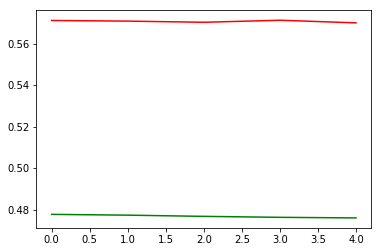

In [45]:
plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['val_loss'],'r')

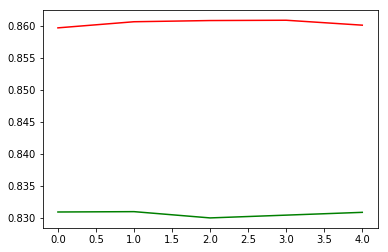

In [72]:
plt.plot(history.epoch, history.history['val_acc'], 'g')
plt.plot(history.epoch, history.history['acc'],'r')

In [73]:
scores = cnn.evaluate(x_test, T_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 83.09%


In [90]:
def genericClassifier(clfr, x_train_data, y_train_data, x_test_data, y_test_data, acc_str, matrix_header_str):
    """run chosen classifier and display results"""
    start_time = time.time()
    clfr.fit(x_train_data, y_train_data)
    y_pred = clfr.predict(x_test_data)
    print("Time taken for prediction = %f seconds" % (time.time() - start_time))

    print(acc_str.format(accuracy_score(y_test_data, y_pred) * 100))
    acc=accuracy_score(y_test_data, y_pred) * 100
    return y_pred,acc


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time
print('KNN Classifier starting ...')
partialDataKNNClassifier = KNeighborsClassifier()
y_pred,knnacc=genericClassifier(partialDataKNNClassifier, X_train, T_train, X_test, T_test, "CNN-KNN Accuracy: {0:0.1f}%", "SVM Confusion matrix")

KNN Classifier starting ...
